In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/SEM4/Research Method/RM Kel 19 Experiment/data-final.csv", sep='\t')
# dataset = pd.read_csv("/content/drive/MyDrive/RESEARCH METHOD 19/XGBoost/RM Kel 19 Experiment/data-final.csv", sep='\t')
print(dataset.shape)
dataset.head()

(1015341, 110)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [ ]:
data = dataset.drop(list(dataset)[50:], axis=1)

print(data.shape)
data.head()

(1015341, 50)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [ ]:
for i in data.columns:
  data = data[(data[i].notna()) & (data[i] != 0)]

print(data.shape)

(874434, 50)


In [ ]:
data['EST9'].value_counts()

4.0    247851
2.0    199050
3.0    182001
5.0    133152
1.0    112380
Name: EST9, dtype: int64

In [ ]:
x = data.drop(columns=['EST9'])
y = data['EST9']

In [ ]:
print(data.shape)

(874434, 50)


### Random oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversampler = RandomOverSampler(random_state=42)

In [ ]:
x, y = oversampler.fit_resample(x, y)

### Split train set - test set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [ ]:
y_train_1 = y_train - 1
y_test_1 = y_test - 1

# Training XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax',
                            num_class=5,
                            max_depth=10,
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)

In [54]:
xgb_clf.fit(x_train, y_train_1, verbose=0, eval_set=[(x_train, y_train_1), (x_test, y_test_1)])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=5, num_parallel_tree=None, objective='multi:softmax', ...)

In [55]:
y_pred = xgb_clf.predict(x_test)

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test_1, y_pred, digits = 4))

              precision    recall  f1-score   support

         0.0     0.7365    0.8090    0.7710     24727
         1.0     0.5374    0.5357    0.5365     24600
         2.0     0.5308    0.4947    0.5121     24769
         3.0     0.5104    0.4826    0.4961     24975
         4.0     0.7594    0.7807    0.7699     24855

    accuracy                         0.6204    123926
   macro avg     0.6149    0.6205    0.6171    123926
weighted avg     0.6149    0.6204    0.6171    123926



## XGBoost Feature Importance

Nunjukin feature mana yang paling penting. Buat feature selection, buat training selanjutnya.

In [58]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

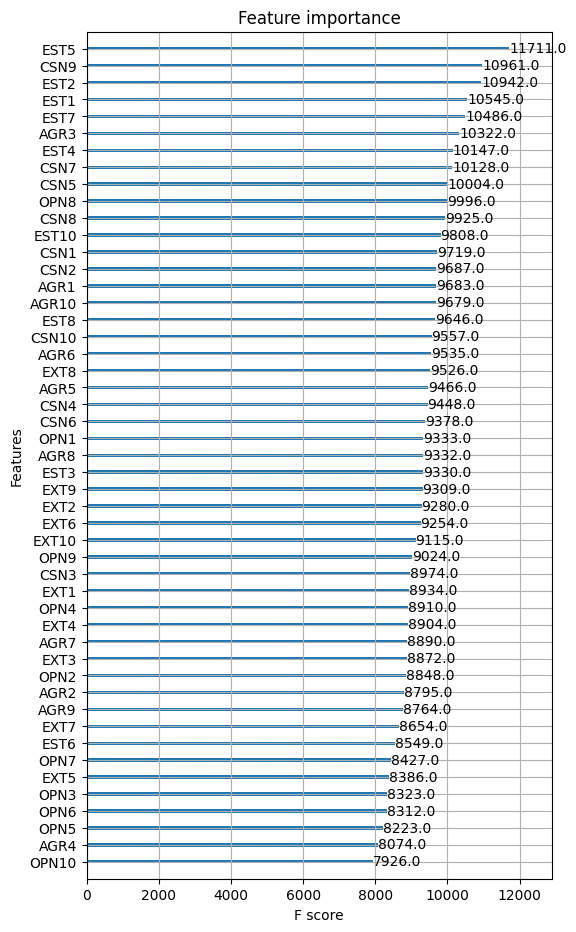

In [59]:
ax = xgb.plot_importance(xgb_clf)
fig = ax.figure
fig.set_size_inches(6, 11)
plt.show()